<a href="https://colab.research.google.com/github/Praneeth-18/DataMining7/blob/main/UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install umap-learn
!pip install scikit-learn
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.0 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86831 sha256=f7bcf7a56d1261f81554f333da7b9e55ecf1548012ce4dede8c68a812bce061f
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [2]:
import umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Load the dataset
digits = load_digits()
X, y = digits.data, digits.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


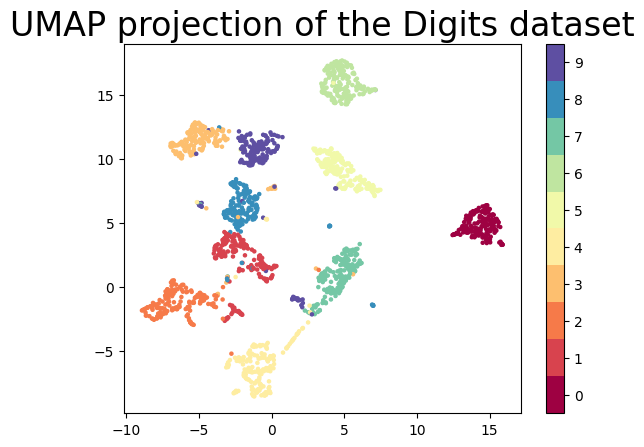

In [5]:
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='Spectral', s=5)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


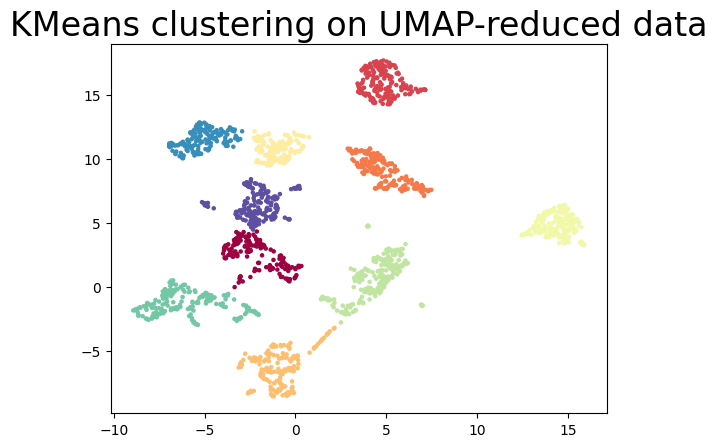

In [6]:
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_umap)

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters, cmap='Spectral', s=5)
plt.title('KMeans clustering on UMAP-reduced data', fontsize=24)
plt.show()

In [7]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_umap, y, test_size=0.3, random_state=42)

# Train a classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9796296296296296


In [8]:
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [10]:
pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 16.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039182 sha256=38260b050359c41c4eb26b1ec9a790455e2b705b1bf46d61c28fdf7b9f1369d5
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.5
    Uninstalling Cython-3.0.5:
      Successfully uninstalled Cython-3.0.5


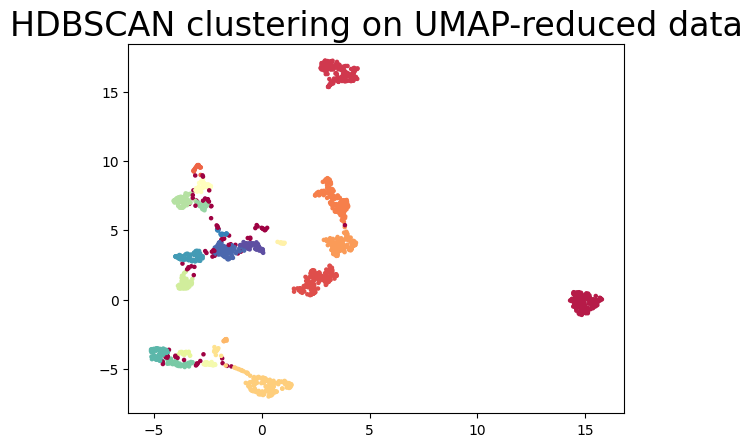

In [11]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=10, gen_min_span_tree=True)
clusters = clusterer.fit_predict(X_umap)

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters, cmap='Spectral', s=5)
plt.title('HDBSCAN clustering on UMAP-reduced data', fontsize=24)
plt.show()

In [12]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_umap, clusters)
print("Silhouette Score: ", score)

Silhouette Score:  0.63530064


In [13]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# SVM Classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

print("SVM Classifier Report")
print(classification_report(y_test, y_pred_svm))

SVM Classifier Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.93      1.00      0.96        50
           2       1.00      0.98      0.99        47
           3       0.98      0.87      0.92        54
           4       1.00      0.98      0.99        60
           5       0.98      0.98      0.98        66
           6       0.96      1.00      0.98        53
           7       0.83      0.98      0.90        55
           8       0.76      0.86      0.80        43
           9       1.00      0.76      0.87        59

    accuracy                           0.94       540
   macro avg       0.94      0.94      0.94       540
weighted avg       0.95      0.94      0.94       540



In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]}
grid_search = GridSearchCV(SVC(), param_grid, refit=True)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 1, 'gamma': 1}


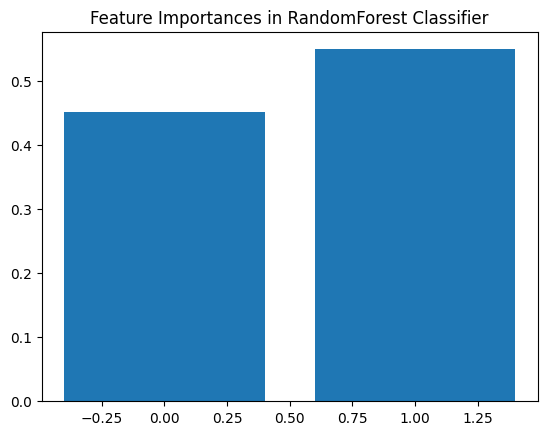

In [15]:
importances = classifier.feature_importances_
plt.bar(range(len(importances)), importances)
plt.title('Feature Importances in RandomForest Classifier')
plt.show()

In [16]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, X_umap, y, cv=5)
print("Cross-Validation Scores:", scores)

Cross-Validation Scores: [0.96111111 0.93611111 0.9637883  0.96657382 0.96100279]


In [17]:
# Add cluster labels as a feature
X_combined = np.hstack((X_umap, clusters.reshape(-1, 1)))

# Split the data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_combined, y, test_size=0.3, random_state=42)

# Train and evaluate a classifier
classifier_c = RandomForestClassifier(random_state=42)
classifier_c.fit(X_train_c, y_train_c)
y_pred_c = classifier_c.predict(X_test_c)

print("Accuracy with Clustering Feature:", accuracy_score(y_test_c, y_pred_c))

Accuracy with Clustering Feature: 0.9777777777777777
